# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

In [1]:
import pandas as pd

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [2]:
df = pd.read_csv('Mall_Customers.csv')

df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [3]:
df.shape

(200, 5)

In [4]:
df.isna().sum()

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [5]:
df['Genre'].value_counts(dropna=False)


Genre
Female     102
Male        77
NaN         19
Feemale      2
Name: count, dtype: int64

In [6]:
df['Age'].value_counts(dropna=False)

Age
NaN      20
32.0     10
35.0      8
31.0      7
30.0      7
49.0      7
19.0      6
40.0      6
47.0      6
27.0      6
23.0      6
36.0      5
38.0      5
48.0      5
54.0      4
29.0      4
20.0      4
34.0      4
18.0      4
59.0      4
37.0      3
33.0      3
43.0      3
67.0      3
22.0      3
50.0      3
68.0      3
39.0      3
28.0      3
21.0      3
60.0      3
24.0      3
45.0      3
46.0      3
25.0      3
57.0      2
26.0      2
44.0      2
51.0      2
135.0     2
65.0      2
58.0      2
53.0      2
52.0      2
41.0      2
63.0      1
70.0      1
69.0      1
55.0      1
66.0      1
56.0      1
42.0      1
Name: count, dtype: int64

<Axes: >

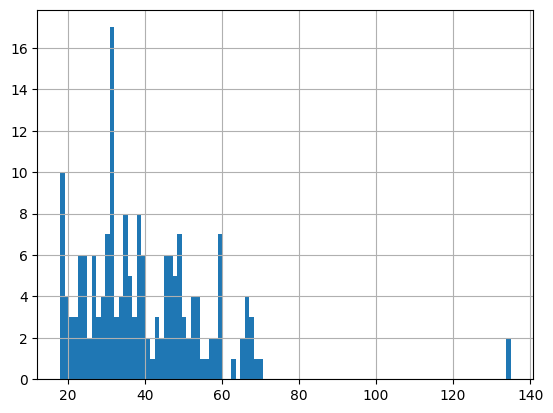

In [7]:
df['Age'].hist(bins=100)

In [13]:
df['Age'].describe()

count    180.000000
mean      39.894444
std       16.842848
min       18.000000
25%       29.000000
50%       36.000000
75%       49.000000
max      135.000000
Name: Age, dtype: float64

In [7]:
df['Annual Income (k$)'].value_counts(dropna=False)

Annual Income (k$)
NaN          20
78.0         11
54.0         11
87.0          6
60.0          6
             ..
1000000.0     1
76.0          1
74.0          1
69.0          1
15.0          1
Name: count, Length: 65, dtype: int64

In [12]:
df['Annual Income (k$)'].describe()

count        180.000000
mean        5615.433333
std        74531.115872
min           15.000000
25%           42.000000
50%           61.000000
75%           78.000000
max      1000000.000000
Name: Annual Income (k$), dtype: float64

<Axes: >

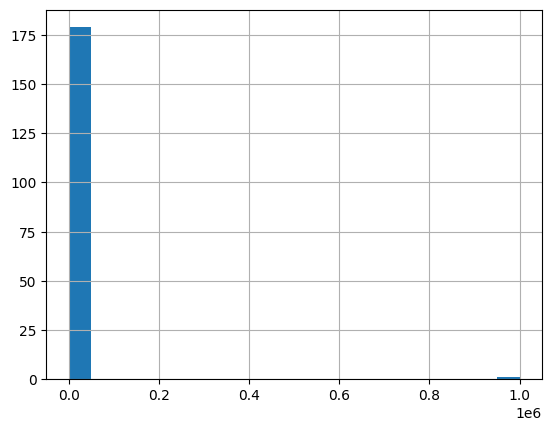

In [11]:
df['Annual Income (k$)'].hist(bins=20)

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [ ]:
### YOUR CODE HERE ###


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [ ]:
### YOUR CODE HERE ###


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [ ]:
### YOUR CODE HERE ###


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [ ]:
### YOUR CODE HERE ###


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [ ]:
### YOUR CODE HERE ###


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [ ]:
### YOUR CODE HERE ###
